In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [85]:
df1 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_X.csv')
df2 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_Y.csv')

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.4)

In [60]:
#X_train = preprocessing.scale(X_train)

#X_test = preprocessing.scale(X_train)

In [129]:
df1.describe()

,MD_Norm,BMK_STAT Norm,HRA_norm,YME_Norm,RHOB_Norm,Vertical_Norm,SMG Norm,PR_DYN,TNPH
count,1045.00000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.72360,0.435336,0.244689,0.631520,0.259990,0.816764,0.402161,0.256835,0.030456
std,0.01509,0.044559,0.102193,0.056975,0.008255,0.017052,0.039096,0.023556,0.023268
min,0.69750,0.197730,0.000000,0.313471,0.174460,0.787271,0.191197,0.156378,0.006600
25%,0.71055,0.412572,0.200000,0.615771,0.258260,0.802018,0.390357,0.242309,0.016200
50%,0.72360,0.436558,0.200000,0.639009,0.260210,0.816764,0.406914,0.255178,0.021900
75%,0.73665,0.460679,0.300000,0.659622,0.261890,0.831510,0.423181,0.270588,0.035300
max,0.74970,0.607010,0.500000,0.839937,0.287200,0.846257,0.532654,0.346385,0.197900


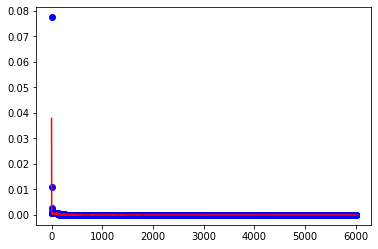

In [87]:

model = Sequential()
model.add(Dense(19, activation='sigmoid', input_shape=(9,)))

model.add(Dense(1,))

model.compile(Adam(lr=0.003), 'mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 6000, validation_split = 0.2, verbose = 0)
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values,'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')

In [128]:
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
plt.plot(loss_values,'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.show()

KeyError: 'acc'

In [88]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the train set is:	0.998
The R2 score on the test set is:	0.998


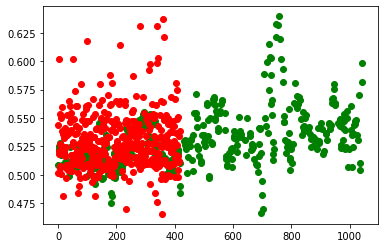

In [90]:

plt.clf()
#plt.plot(y_train,'go', y_train_pred, 'bo', label='Predicted SHmax')
plt.plot(y_test, 'go', y_test_pred, 'ro', label='val training loss')

In [77]:
y_test.describe

<bound method NDFrame.describe of       Shmax_norm
716     0.575033
878     0.533110
253     0.519445
504     0.531692
490     0.511837
...          ...
1035    0.529296
550     0.541137
815     0.564632
165     0.534935
540     0.553593

[418 rows x 1 columns]>

In [84]:
y_test_pred.shape

(627, 1)

In [82]:
y_test

,Shmax_norm
716,0.575033
878,0.533110
253,0.519445
504,0.531692
490,0.511837
...,...
1035,0.529296
550,0.541137
815,0.564632
165,0.534935


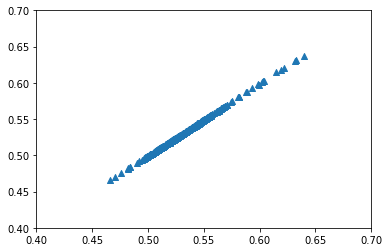

In [105]:
plt.scatter(y_test, y_test_pred, marker='^')
plt.xlim(0.4,0.7)
plt.ylim(0.4,0.7)
plt.show()

In [130]:
model.evaluate(X_test, y_test_pred, verbose=1)

418/418 [==============================] - 4s 10ms/step


0.0

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

YellowbrickTypeError: This estimator is not a regressor; try a classifier or clustering score visualizer instead!

In [111]:
from pandas import DataFrame
df = DataFrame(y_test_pred)


In [114]:
export_csv=df.to_csv(r'C:\Users\HP\Documents\Well PR\result.csv',index=None, header=True)

In [118]:
df22=DataFrame(y_test)
export_csv=df22.to_csv(r'C:\Users\HP\Documents\Well PR\result22.csv',index=None, header=True)

In [116]:
print(df)

            0
0    0.543748
1    0.501325
2    0.518421
3    0.521353
4    0.601969
..        ...
413  0.516831
414  0.511101
415  0.534116
416  0.512377
417  0.538936

[418 rows x 1 columns]


In [117]:
print(df22)

     Shmax_norm
968    0.545275
687    0.502186
413    0.519406
204    0.522431
729    0.602812
..          ...
11     0.517854
131    0.511978
502    0.535322
386    0.513296
857    0.540300

[418 rows x 1 columns]
